In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Read Dataset**

In [50]:
#read the CSV file with a comma delimiter
df = pd.read_csv("/content/drive/MyDrive/Praktikum_ML/praktikum11/data/Iris.csv", sep=",")

#cetak header data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Data Preparation**

In [51]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


# **Cek Variasi Spesiesnya**

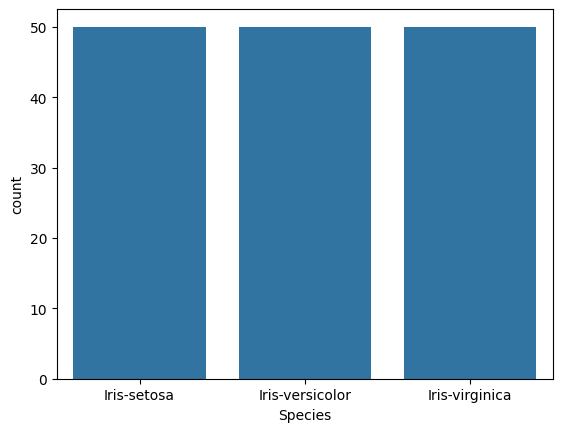

In [52]:
sns.countplot(x="Species", data=df)
plt.show()

In [53]:
#fitur untuk clustering
X = df.drop(['Id', 'Species'], axis=1)

In [54]:
X[10:16] #untuk melihat data ke 10 sampai 15

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,5.4,3.7,1.5,0.2
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

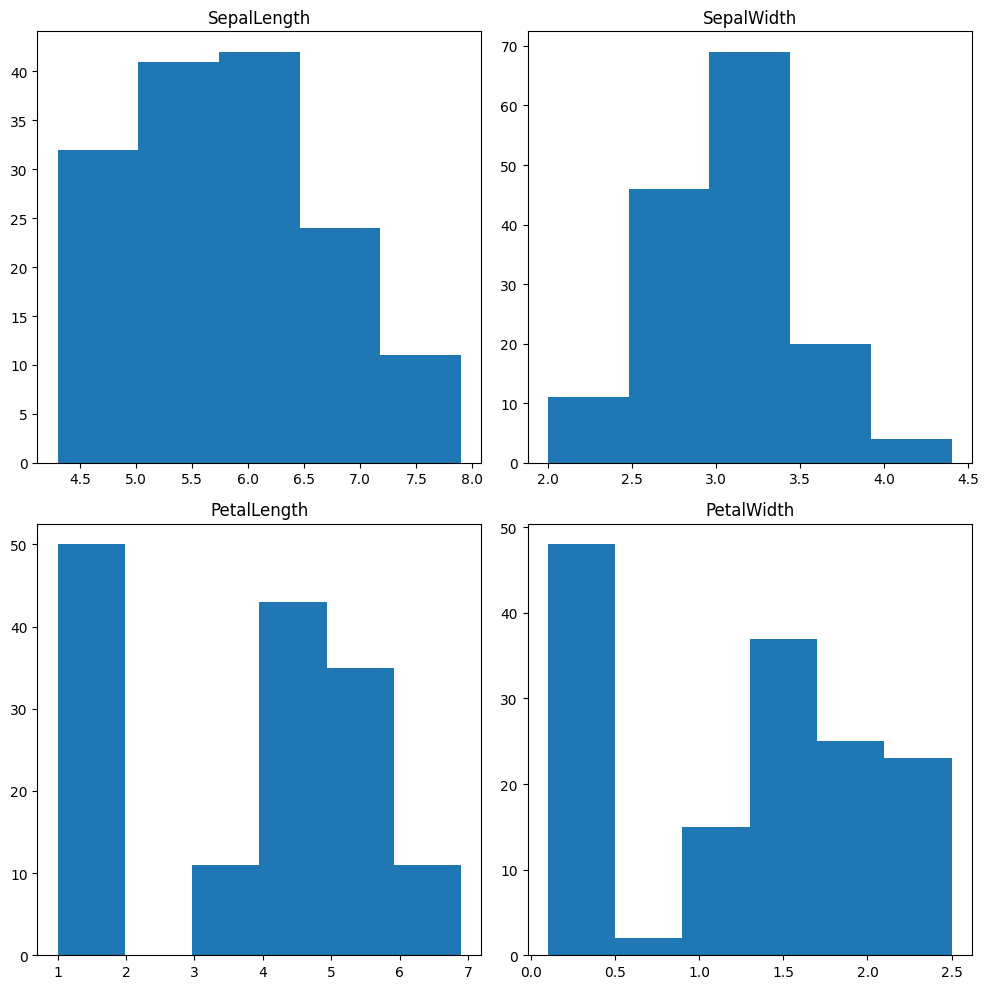

In [56]:
from matplotlib import axes
fig, axes = plt.subplots(2, 2, figsize=(10,10))

#Histogram 1: sepal length
axes[0,0].set_title("SepalLength")
axes[0,0].hist(X['SepalLengthCm'], bins=5)

#Histogram 2: sepal Width
axes[0,1].set_title("SepalWidth")
axes[0,1].hist(X['SepalWidthCm'], bins=5)

#Histogram 3: petal length
axes[1,0].set_title("PetalLength")
axes[1,0].hist(X['PetalLengthCm'], bins=6)

#Histogram 4: petal width
axes[1,1].set_title("PetalWidth")
axes[1,1].hist(X['PetalWidthCm'], bins=6)

plt.tight_layout()
plt.show()

# **Normalisasi Data**

# **Standarisasi Data**

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#pre-initialize x from the original dataframe 'df'
#this entures

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

#now apply the scaling
X = scaler.fit_transform(X)
X[:5]


array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# **Mencari nilai K terbaik**

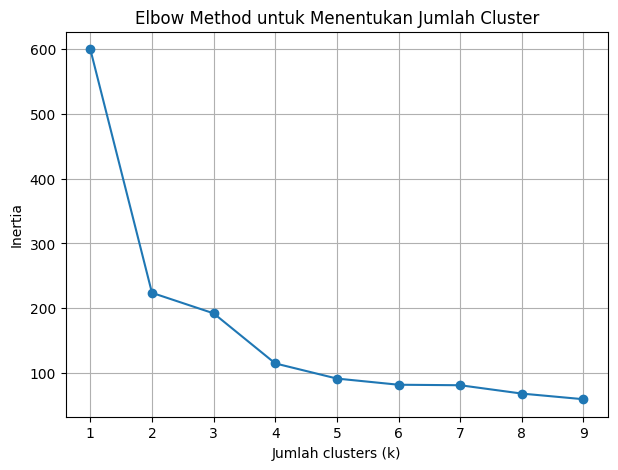

In [58]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

inertia_list = []
K_range = range(1, 10)

for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia_list, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# **Modeling**

In [59]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init="k-means++", random_state = 42)

In [60]:
#1. latih model (menentukan centroid + proses clustering)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [61]:
#2. Prediksi cluster untuk data X
labels = kmeans.predict(X)

In [62]:
#3. Masukkan ke dataframe
df['cluster'] = labels

In [63]:
df ["Cluster"] = kmeans.fit_predict(X)
print("Cluster ditemukan:", df["cluster"].unique())

Cluster ditemukan: [1 2 0]


# **Silhouette  Score**

In [64]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["Cluster"])
print("\n===== Silhouette Score =====")
print("Silhouette Score: ", sil_score)


===== Silhouette Score =====
Silhouette Score:  0.4787241921049546


In [65]:
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

#Cofusion Matrix
print("Confusion Matrix:\n")
cm = confusion_matrix(df['SpeciesEncoded'], df['Cluster'])
print(cm)

Confusion Matrix:

[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


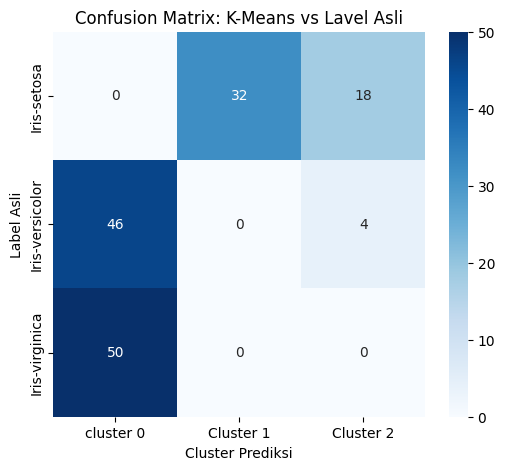

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["cluster 0", "Cluster 1", "Cluster 2"], yticklabels=le.classes_)
plt.title('Confusion Matrix: K-Means vs Lavel Asli')
plt.xlabel('Cluster Prediksi')
plt.ylabel('Label Asli')
plt.show()

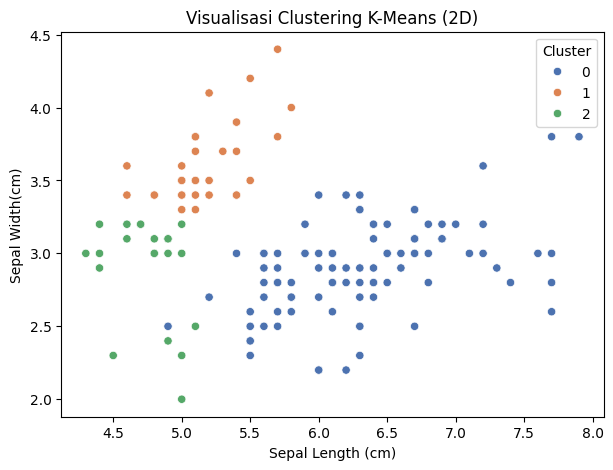

In [68]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"], hue=df["Cluster"], palette="deep")
plt.title("Visualisasi Clustering K-Means (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width(cm)")
plt.show()

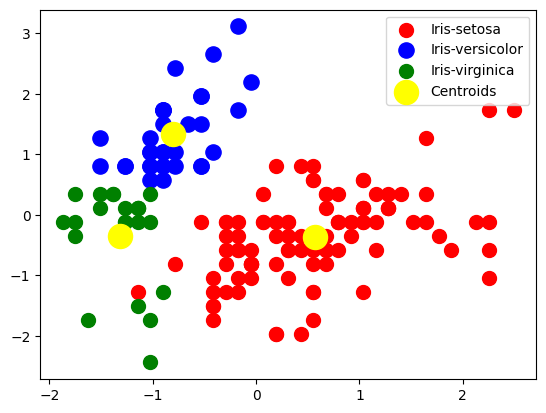

In [69]:
# Visualising the clusters
plt.scatter(X[df["Cluster"] == 0, 0], X[df["Cluster"] == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(X[df["Cluster"] == 1, 0], X[df["Cluster"] == 1, 1], s=120, c='blue', label='Iris-versicolor')
plt.scatter(X[df["Cluster"] == 2, 0], X[df["Cluster"] == 2, 1], s=100, c='green', label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.legend()
plt.show()